In [1]:
import sys , os
sys.path.append(os.pardir)
from common.functions import *
#from common.gradient import numerical_gradient
import numpy as np

# ニューラルネットワークの実装

In [2]:
class TwoLayerNet:
    
    def __init__(self , input_size , hidden_size , output_size , weight_init_std=0.01):
        
        # 重みの初期化
        self.params = {}
        self.params["W1"] = weight_init_std * np.random.randn(input_size , hidden_size)
        self.params["b1"]  = np.zeros(hidden_size)
        self.params["W2"] = weight_init_std * np.random.randn(hidden_size , output_size)
        self.params["b2"] = np.zeros(output_size)
        
    def predict(self , x):
        
        W1 ,W2 = self.params["W1"] , self.params["W2"]
        b1 ,b2 = self.params["b1"] , self.params["b2"]
        
        a1 = np.dot(x ,W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1 ,W2) + b2
        y = softmax(a2)
        
        return y
    
    # x : 入力データ、 t ：　教師データ
    def loss(self , x , t):
        y = self.predict(x)
        
        return cross_entropy_error(y , t)
    
    def accuracy(self , x , t):
        y = self.predict(x)
        y = np.argmax(y , axis=1)
        t = np.argmax(t , axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
    
#     def numerical_gradient(self , x , t):
#         loss_W = lambda W : self.loss(x ,t)
#         grads = {}
#         grads["W1"] = numerical_gradient(loss_W , self.params["W1"])
#         grads["b1"] = numerical_gradient(loss_W , self.params["b1"])
#         grads["W2"] = numerical_gradient(loss_W , self.params["W2"])
#         grads["b2"] = numerical_gradient(loss_W , self.params["b2"])
        
#         return grads
    
    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}
        
        batch_num = x.shape[0]
        
        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        # backward
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)
        
        dz1 = np.dot(dy, W2.T)
        da1 = sigmoid_grad(a1) * dz1
        grads['W1'] = np.dot(x.T, da1)
        grads['b1'] = np.sum(da1, axis=0)

        return grads

In [3]:
from dataset.mnist import load_mnist
(x_train, t_train) , (x_test , t_test) = load_mnist(normalize=True , one_hot_label=True)

In [4]:
print(x_train.shape)

(60000, 784)


In [5]:
train_loss_list = []
train_acc_list = []
test_acc_list = []

In [6]:
# ハイパーパラメータ
iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
lr = 0.1
iter_per_epoch = max(train_size / batch_size, 1)

In [7]:
network = TwoLayerNet(input_size=784, hidden_size=50 , output_size=10)


In [8]:
for idx in range(iters_num):
    # ミニバッチの取得
    batch_mask = np.random.choice(train_size , batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 勾配の計算
    #grad = network.numerical_gradient(x_batch , t_batch)
    grad = network.gradient(x_batch , t_batch)
    
    # パラメータの更新
    for key in ("W1" , "b1" , "W2" , "b2"):
        network.params[key] -= lr * grad[key]
    
    # 　ロスの退避
    loss = network.loss(x_batch , t_batch)
    train_loss_list.append(loss)
    
    # 正解率の計算と退避
    if idx % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

train acc, test acc | 0.09751666666666667, 0.0974
train acc, test acc | 0.7891333333333334, 0.7937
train acc, test acc | 0.8765333333333334, 0.88
train acc, test acc | 0.8967666666666667, 0.8996
train acc, test acc | 0.9079166666666667, 0.9092
train acc, test acc | 0.9142, 0.9151
train acc, test acc | 0.919, 0.9226
train acc, test acc | 0.92315, 0.9251
train acc, test acc | 0.9266833333333333, 0.9291
train acc, test acc | 0.9295333333333333, 0.9315
train acc, test acc | 0.9332666666666667, 0.9354
train acc, test acc | 0.9356166666666667, 0.9374
train acc, test acc | 0.9378333333333333, 0.9379
train acc, test acc | 0.9402, 0.9405
train acc, test acc | 0.9429666666666666, 0.943
train acc, test acc | 0.9453166666666667, 0.9437
train acc, test acc | 0.9466833333333333, 0.9449


In [9]:
from matplotlib import pyplot as plt

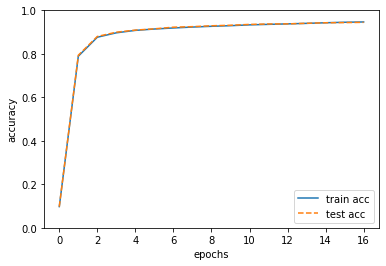

In [10]:
# グラフの描画
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

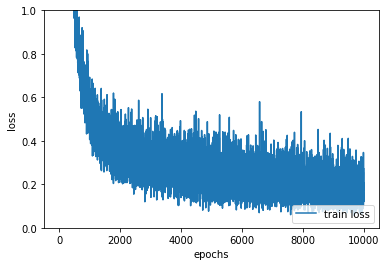

In [12]:
# グラフの描画
markers = {'loss': 'o'}
x = np.arange(len(train_loss_list))
plt.plot(x, train_loss_list, label='train loss')
plt.xlabel("epochs")
plt.ylabel("loss")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()